In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dic = pd.read_csv('dictionary.csv')
dic = dic[['Country', 'Code']]
dic.columns = ['Country_Full', 'Country']
summer = pd.read_csv('summer.csv')
summer = pd.merge(summer, dic, on = 'Country')
summer = summer[summer['Medal'] == 'Gold']
summer['Race'] = summer['Gender'] + ' ' + summer['Event']

In [3]:
us = pd.DataFrame(summer[summer['Country_Full'] == 'United States'].groupby(['Year'])['Race'].nunique())
us.reset_index(inplace = True)
us.columns = ['Year', 'United States']
china = pd.DataFrame(summer[summer['Country_Full'] == 'China'].groupby(['Year'])['Race'].nunique())
china.reset_index(inplace = True)
china.columns = ['Year', 'China']
gold =pd.DataFrame(summer.groupby(['Year'])['Race'].nunique())
gold.reset_index(inplace = True)
gold.columns = ['Year', 'Number of Gold Medals']
cvu = pd.merge(china, us, how = 'left')
cvu = pd.merge(cvu, gold, how = 'left')
cvu['China Win'] = cvu['China'] / cvu['Number of Gold Medals']
cvu['United States Win'] = cvu['United States'] / cvu['Number of Gold Medals']

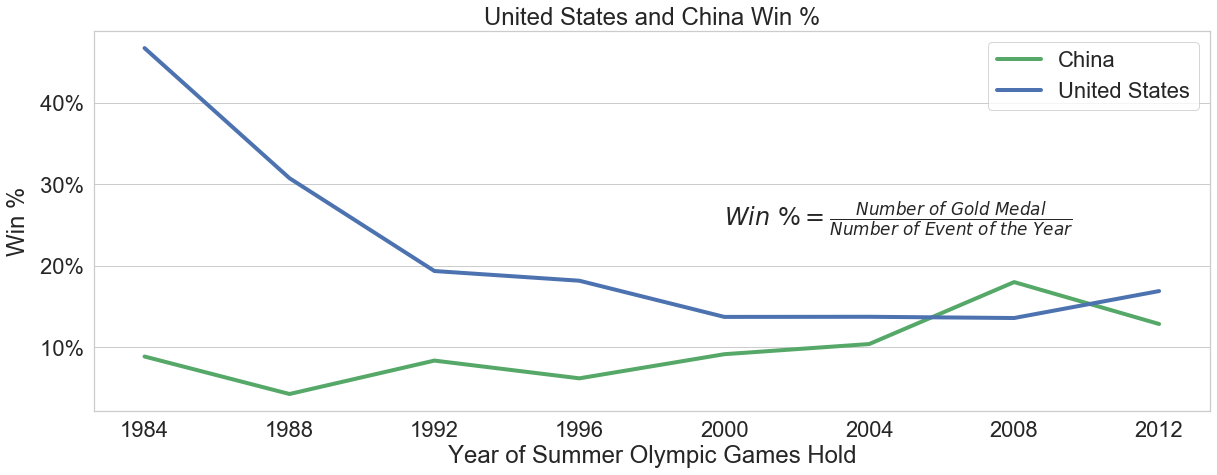

In [6]:
fig, axes = plt.subplots(figsize=(20,7))
sns.set(style = 'whitegrid', font_scale = 2)
axes.xaxis.grid()
axes.plot(cvu['Year'], cvu['China Win'], color = 'g', linewidth = 4, label = 'China')
axes.plot(cvu['Year'], cvu['United States Win'], color = 'b', linewidth = 4, label = 'United States')
axes.set_yticklabels(['{:3.0f}%'.format(x*100) for x in axes.get_yticks()])
axes.xaxis.set_ticks(np.arange(1984, 2015, 4))
axes.set_ylabel('Win %')
axes.set_xlabel('Year of Summer Olympic Games Hold')
axes.set_title('United States and China Win %')
axes.annotate(r'$Win\ \% = \frac{Number\ of\ Gold\ Medal}{Number\ of\ Event\ of\ the\ Year}$', xy = (2000, 0.25))
axes.legend()